In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datasets

c:\Users\harsh\anaconda3\envs\nilmtk-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from nilmtk.dataset import DataSet
redd = DataSet('redd.h5')
building = redd.buildings[1]
main_meter = building.elec.mains()
building.elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric 

In [3]:
dict = {}
appliances = ['fridge', 'dish washer', 'washer dryer', 'sockets', 'light']
for i in appliances:
        dict[i] = building.elec[i].power_series_all_data().to_frame(name=i)

main_df = main_meter.power_series_all_data().to_frame(name='total_power')

dict_dfs = list(dict.values())

# Concatenate all DataFrames into one
df = pd.concat([main_df] + dict_dfs, axis=1)

df = df.dropna()
df.reset_index(inplace=True)
df

Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


,index,total_power,fridge,dish washer,washer dryer,sockets,light
0,2011-04-18 09:22:30-04:00,341.660004,6.0,0.0,0.0,33.0,81.0
1,2011-04-18 09:22:33-04:00,341.839996,6.0,0.0,0.0,34.0,81.0
2,2011-04-18 09:22:51-04:00,346.459991,6.0,1.0,0.0,39.0,82.0
3,2011-04-18 09:22:54-04:00,340.330017,6.0,0.0,0.0,34.0,81.0
4,2011-04-18 09:23:33-04:00,344.459991,6.0,0.0,0.0,38.0,82.0
...,...,...,...,...,...,...,...
136506,2011-05-24 15:55:45-04:00,275.059998,187.0,0.0,0.0,24.0,2.0
136507,2011-05-24 15:56:03-04:00,273.489990,187.0,1.0,0.0,26.0,2.0
136508,2011-05-24 15:56:06-04:00,273.140015,188.0,0.0,0.0,24.0,2.0
136509,2011-05-24 15:56:27-04:00,274.070007,190.0,0.0,0.0,24.0,2.0


In [21]:
# start_time = 97254 
# end_time = 119582
start_time = 0
end_time = 130000

subset_df = df.iloc[start_time:end_time].reset_index(drop=True)
time = np.arange(start_time, end_time)

c:\Users\harsh\anaconda3\envs\nilmtk-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


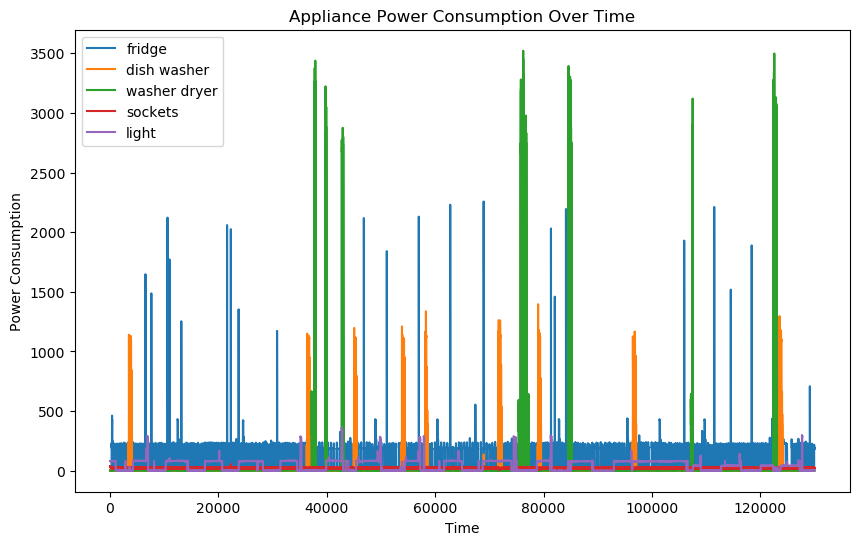

In [22]:
# Plot the data
plt.figure(figsize=(10, 6))
for app in appliances:
    plt.plot(time, subset_df[app].to_numpy(), label=f"{app}")

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Power Consumption')
plt.title('Appliance Power Consumption Over Time')
plt.legend()

# Show the plot
plt.show()

In [30]:
series = pd.Series(subset_df['index'])
# Function to extract HH:MM
def extract_time(datetime_str):
    return pd.to_datetime(datetime_str).strftime('%H:%M')


# Apply the function to the Series
time_series = series.apply(extract_time)
time_series


subset_df['timestamp'] = time_series
result_df = subset_df.groupby('timestamp', as_index=False).mean()
result_df

0         09:22
1         09:22
2         09:22
3         09:22
4         09:23
          ...  
129995    17:44
129996    17:44
129997    17:45
129998    17:45
129999    17:45
Name: index, Length: 130000, dtype: object

In [15]:
# Run the loop
data = []
chunksize = 15
for start in (range(0, len(result_df) - (chunksize), 15)):
    current_chunk = result_df.iloc[start:start+chunksize]
    input_string = current_chunk[['timestamp', 'total_power']].to_csv(index=False, header=False)
    input_string = input_string.replace(" ", "").replace('\n', ',').replace(',', ' , ').replace('\r','')
    gpt_string = current_chunk[['timestamp', 'total_power','fridge','dish washer','washer dryer','sockets','light']].to_csv(index=False, header=False)
    gpt_string = gpt_string.replace(" ", "").replace('\n', ',').replace(',', ' , ').replace('\r','')
    data.append([ { "from": "human", "value": input_string }, { "from": "gpt", "value": gpt_string } ])
    

In [16]:
len(data)

95

In [24]:
new_data = {
    'conversation': data,
}
    

In [26]:
redd_df = pd.DataFrame(new_data)
print(redd_df)
redd_df.to_parquet('data1.parquet', engine='pyarrow')

                                         conversation
0   [{'from': 'human', 'value': '00:00 , 151.06999...
1   [{'from': 'human', 'value': '00:15 , 152.42091...
2   [{'from': 'human', 'value': '00:30 , 344.049 ,...
3   [{'from': 'human', 'value': '00:45 , 151.649 ,...
4   [{'from': 'human', 'value': '01:00 , 153.79819...
..                                                ...
90  [{'from': 'human', 'value': '22:30 , 254.10092...
91  [{'from': 'human', 'value': '22:45 , 267.8578 ...
92  [{'from': 'human', 'value': '23:00 , 143.50818...
93  [{'from': 'human', 'value': '23:15 , 275.8218 ...
94  [{'from': 'human', 'value': '23:30 , 259.60834...

[95 rows x 1 columns]


In [ ]:
from datasets import load_dataset
dataset = load_dataset("philschmid/guanaco-sharegpt-style", split = "train")